In [ ]:
1. 데이터 시각화 
2. 데이터 전처리 및 파생변수 생성
3. 회귀분석 

In [1]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('./white.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 1. 데이터 정제 및 시각화

## 1 ) 결측치 확인

In [3]:
data.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
y      0
dtype: int64

## 2 ) 기초 통계량 확인

In [22]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 3 ) 이상치 확인

In [4]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0xd42cde8080>,
 'caps': [<matplotlib.lines.Line2D at 0xd42cde8710>,
 'boxes': [<matplotlib.lines.Line2D at 0xd42cdd9d30>],
 'medians': [<matplotlib.lines.Line2D at 0xd42cde8da0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd42cdf4128>],
 'means': []}

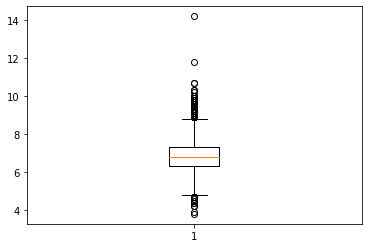

In [16]:
plt.boxplot(data['x1'])

{'whiskers': [<matplotlib.lines.Line2D at 0xd42ce40908>,
 'caps': [<matplotlib.lines.Line2D at 0xd42ce4f048>,
 'boxes': [<matplotlib.lines.Line2D at 0xd42ce407b8>],
 'medians': [<matplotlib.lines.Line2D at 0xd42ce4f6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd42ce4fa20>],
 'means': []}

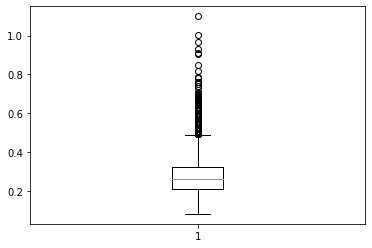

In [17]:
plt.boxplot(data['x2'])

In [19]:
def del_abnormal(df, col) :
    q1, q3 = np.percentile(df[col], [25,75])
    irq = q3 - q1
    upper = q3 + irq * 1.5
    lower = q1 - irq * 1.5
    mask1 = df[col] > upper
    mask2 = df[col] < lower
    df = df.loc[ ~mask1 & ~mask2 ]
    df.sample(3)
    return df

In [25]:
cols = data.columns

for i in cols :
    data = del_abnormal(data,i)
    print(len(data))

4779
4605
4338
4330
4175
4126
4123
4123
4067
3969
3969
3811


# 2. 예측

In [28]:
X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
Y = data['y']

In [30]:
from sklearn import linear_model as lr

In [31]:
model = lr.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(data['y'].unique())

[6 5 7 4]


3, 8, 9 의 값들이 다 사라졌다.
# 상관관계 그려보기

In [36]:
import pandas as pd
data.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
x1,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
x2,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
x3,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
x4,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
x5,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
x6,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
x7,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
x8,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
x9,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
x10,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [49]:
tmp = data.corr()['y']
tmp.sort_values()
# 8, 5, 2, 7, 1, 11

x8    -0.307123
x5    -0.209934
x2    -0.194723
x7    -0.174737
x1    -0.113663
x4    -0.097577
x3    -0.009209
x6     0.008158
x10    0.053678
x9     0.099427
x11    0.435575
y      1.000000
Name: y, dtype: float64

In [39]:
import seaborn as sns

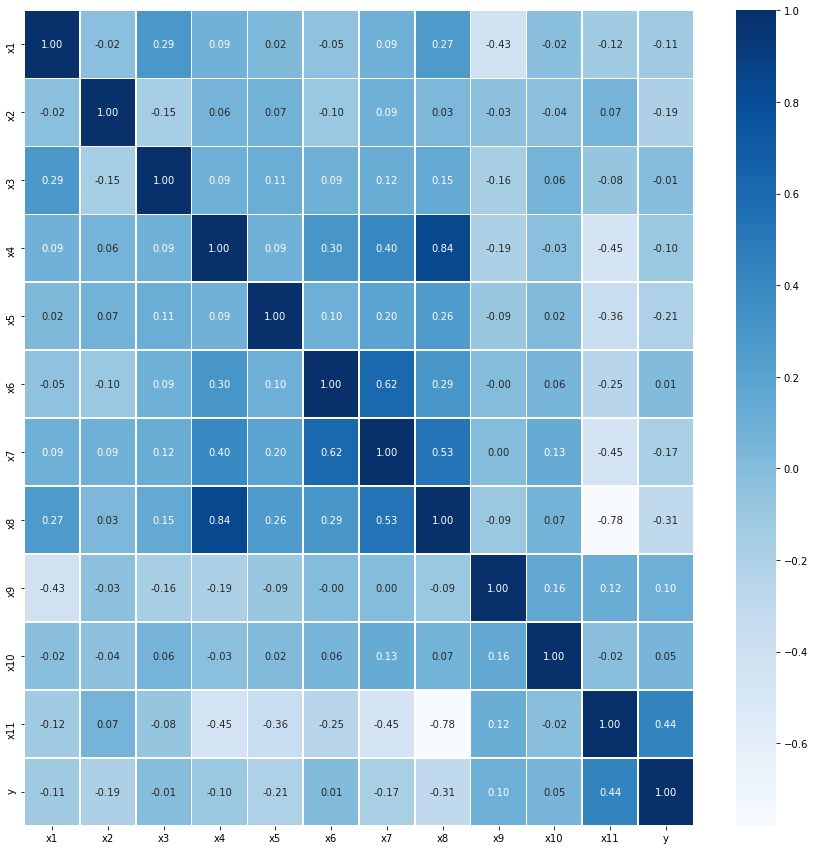

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
def del_abnormal(df, col) :
    q1, q3 = np.percentile(df[col], [25,75])
    irq = q3 - q1
    upper = q3 + irq * 1.5
    lower = q1 - irq * 1.5
    mask1 = df[col] > upper
    mask2 = df[col] < lower
    df = df.loc[ ~mask1 & ~mask2 ]
    df.sample(3)
    return df

In [50]:
cols = ['x8', 'x5', 'x2', 'x7', 'x1', 'x11']
for i in cols :
    data = del_abnormal(data, i)

In [80]:
X= data[['x8', 'x5', 'x2', 'x7', 'x1', 'x11']]
Y = data[['y']]

model = lr.LinearRegression()
model.fit(X, Y)

print(data['y'].unique())

[6 5 7 8 4 3 9]


# train, test 로 분리해보자

In [81]:
split_num = round(len(data)*0.7)
train_X = X[:split_num]
test_X = X[split_num:]
train_Y = Y[:split_num]
test_Y = Y[split_num:]

In [82]:
train_Y

,y
0,6
1,6
2,6
3,6
4,6
...,...
3442,7
3443,6
3444,5
3445,8


In [85]:
train_Y['y'].value_counts()

6    1358
5     904
7     599
8     126
4      82
3       8
9       4
Name: y, dtype: int64

In [87]:
test_Y['y'].value_counts()

6    672
5    336
7    251
8     36
4     24
3      1
Name: y, dtype: int64

In [110]:
import tensorflow as tf

X = tf.placeholder(shape = [None, 6], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)
W = tf.Variable(tf.random_normal([6, 1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                                labels = Y))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.00000001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : train_X,
                             Y : train_Y
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

cost값은 : -735.0939331054688
cost값은 : -749.525146484375
cost값은 : -763.9569091796875
cost값은 : -778.388916015625
cost값은 : -792.8203735351562
cost값은 : -807.2521362304688
cost값은 : -821.6836547851562
cost값은 : -836.1153564453125
cost값은 : -850.5470581054688
cost값은 : -864.97900390625


In [112]:
predict = tf.cast( H >= 0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy,
                                  feed_dict = {X : test_X,
                                               Y : test_Y})))

정확도는 : 0.0
